In [1]:
# Importing data from datasource
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.pandas.set_option('display.max_columns',None)

In [2]:
dataset = pd.read_csv('X_train.csv')
dataset.head()

,source,host_response_time,host_is_superhost,host_listings_count,host_verifications,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,month,review_period_years,amenities_count
0,0,2,0,1.0,0,1,10,43.64590,-79.42423,11,2,10,1.0,8,5.0,1.0,100.0,28,730,28,28,730,730,28.0,730.0,0,0,0,0,0,6,0,0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0,1,1,0,0,0.06,2,2,13
1,0,2,0,2.0,0,0,19,43.64080,-79.37673,2,1,2,1.0,5,1.0,1.0,100.0,180,365,180,180,365,365,180.0,365.0,0,0,0,0,0,169,0,0,4.84,4.81,4.89,4.87,4.90,4.92,4.83,0,2,1,1,0,0.95,2,4,10
2,1,1,0,5.0,2,1,19,43.64608,-79.39032,9,2,4,1.0,4,1.0,2.0,145.0,28,1125,28,28,1125,1125,28.0,1125.0,0,0,0,0,173,42,2,0,4.79,4.79,4.79,4.64,4.76,4.86,4.67,0,5,5,0,0,0.26,2,12,43
3,1,2,0,1.0,2,1,14,43.66884,-79.32725,7,2,1,1.0,4,0.0,1.0,75.0,90,365,90,90,365,365,90.0,365.0,0,0,0,0,0,29,2,0,4.93,5.00,4.86,5.00,5.00,4.86,4.86,0,1,1,0,0,0.17,2,14,48
4,0,2,0,2.0,0,0,19,43.64015,-79.37625,7,2,2,1.0,5,1.0,1.0,100.0,180,365,180,180,365,365,180.0,365.0,0,0,0,0,0,1,0,0,5.00,4.92,4.87,4.96,4.98,4.92,4.80,0,2,1,1,0,0.01,2,0,10


In [3]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [4]:
## Capture the deppendent var
y_train = dataset[['price']]

In [5]:
y_train

,price
0,100.0
1,100.0
2,145.0
3,75.0
4,100.0
...,...
248518,350.0
248519,89.0
248520,170.0
248521,150.0


In [6]:
## Drop dependent Var from dataset
X_train = dataset.drop(['price'],axis=1)

In [7]:
X_train.head()

,source,host_response_time,host_is_superhost,host_listings_count,host_verifications,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,month,review_period_years,amenities_count
0,0,2,0,1.0,0,1,10,43.64590,-79.42423,11,2,10,1.0,8,5.0,1.0,28,730,28,28,730,730,28.0,730.0,0,0,0,0,0,6,0,0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0,1,1,0,0,0.06,2,2,13
1,0,2,0,2.0,0,0,19,43.64080,-79.37673,2,1,2,1.0,5,1.0,1.0,180,365,180,180,365,365,180.0,365.0,0,0,0,0,0,169,0,0,4.84,4.81,4.89,4.87,4.90,4.92,4.83,0,2,1,1,0,0.95,2,4,10
2,1,1,0,5.0,2,1,19,43.64608,-79.39032,9,2,4,1.0,4,1.0,2.0,28,1125,28,28,1125,1125,28.0,1125.0,0,0,0,0,173,42,2,0,4.79,4.79,4.79,4.64,4.76,4.86,4.67,0,5,5,0,0,0.26,2,12,43
3,1,2,0,1.0,2,1,14,43.66884,-79.32725,7,2,1,1.0,4,0.0,1.0,90,365,90,90,365,365,90.0,365.0,0,0,0,0,0,29,2,0,4.93,5.00,4.86,5.00,5.00,4.86,4.86,0,1,1,0,0,0.17,2,14,48
4,0,2,0,2.0,0,0,19,43.64015,-79.37625,7,2,2,1.0,5,1.0,1.0,180,365,180,180,365,365,180.0,365.0,0,0,0,0,0,1,0,0,5.00,4.92,4.87,4.96,4.98,4.92,4.80,0,2,1,1,0,0.01,2,0,10


In [8]:
X_train.shape

(248523, 48)

In [16]:
X_train_scaled

array([[-1.7292629 ,  0.40527666, -0.68642339, ..., -1.01822688,
         0.29185149, -0.81355085],
       [-1.7292629 ,  0.40527666, -0.68642339, ..., -1.01822688,
         1.21422558, -0.96614379],
       [ 0.57828107, -1.00757204, -0.68642339, ..., -1.01822688,
         4.90372194,  0.71237851],
       ...,
       [ 0.57828107, -2.42042073, -0.68642339, ...,  0.73259564,
        -0.63052259,  0.71237851],
       [ 0.57828107, -2.42042073, -0.68642339, ...,  0.73259564,
        -0.63052259,  0.76324282],
       [ 0.57828107,  0.40527666, -0.68642339, ...,  0.73259564,
        -0.63052259,  0.6615142 ]])

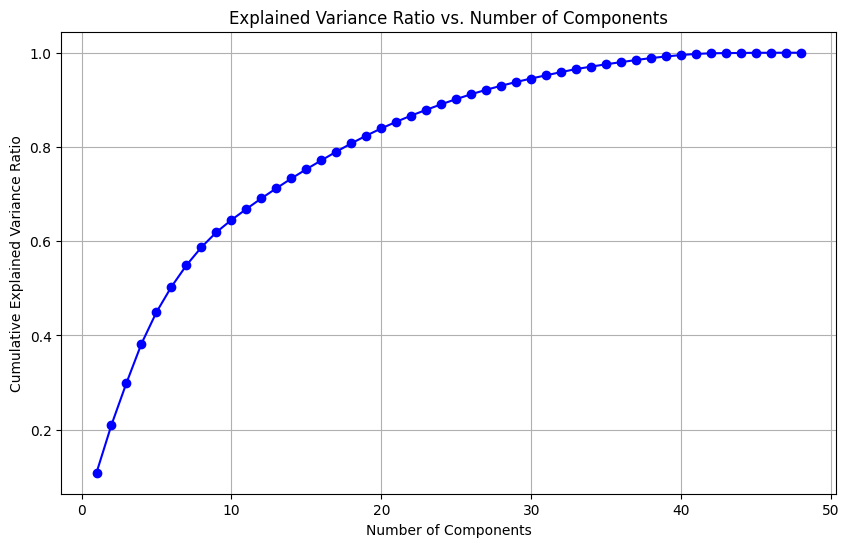

Original shape: (248523, 48)
New shape after PCA: (248523, 39)
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.416443  2.833103 -0.435320  3.761103 -2.199325 -1.097847 -0.202382   
1  2.884529  5.486680  2.270594 -0.733438 -0.655133  5.585005 -1.060752   
2  0.724235  1.691014 -1.641438  2.009005  1.537187  0.324630  1.115650   
3  0.359357  2.924302  0.472833 -0.398984 -0.139554  3.499689  0.127470   
4  2.588371  6.156647  3.317140  0.166673 -2.069987  4.277930 -1.111644   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  1.018977  0.008507  0.511063  0.909679  1.259182 -0.223158 -0.634767   
1  0.409504  0.311584 -0.421896  2.453166  1.312461  0.388673  0.009611   
2 -0.817816 -4.089564 -0.796025  1.149638  0.561401 -0.058423  1.910248   
3 -0.344233 -3.885412 -1.764469  0.882855  1.115722 -0.243562  2.655169   
4 -0.641636  1.327183  0.032508  0.602483  0.934935  0.121670 -0.499365   

       PC15      PC16      PC17    

In [10]:
# Step 1: Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Step 2: Apply PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

# Step 3: Determine the number of components to keep
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.grid(True)
plt.show()

# Step 4: Choose the number of components
# For example, let's say we want to keep 95% of the variance
n_components = np.argmax(cumulative_variance_ratio >= 0.99) + 1

# Step 5: Apply PCA with the chosen number of components
pca_final = PCA(n_components=n_components)
X_train_pca_final = pca_final.fit_transform(X_train_scaled)

# Print the shape of the new dataset
print(f"Original shape: {X_train.shape}")
print(f"New shape after PCA: {X_train_pca_final.shape}")

# Step 6: Create a new DataFrame with PCA components
pca_df = pd.DataFrame(
    data=X_train_pca_final,
    columns=[f'PC{i+1}' for i in range(n_components)]
)

# Optional: Add the most important original features
feature_importance = np.abs(pca_final.components_).sum(axis=0)
top_features_idx = feature_importance.argsort()[::-1][:5]  # Top 5 features
for idx in top_features_idx:
    pca_df[X_train.columns[idx]] = X_train.iloc[:, idx]

print(pca_df.head())

In [11]:
# Apply Feature Selection
# First specify Lasso Regression Model, and select suitable alpha (equivalent aof penalty)
# The bigger the alpha the less feature it will select

# Then use SelectFRomModel object from Sklearn, which will select the features which coefficients are non-Zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.005,random_state=0)) ## remember to set the seed value
feature_sel_model.fit(X_train,y_train)

C:\Users\bikas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.616e+09, tolerance: 2.030e+06
  model = cd_fast.enet_coordinate_descent(


SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [12]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [13]:
# Print the number of total and selected features
# This is how we can make a list of selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# print all stats
print('Total Features:{}'.format((X_train.shape[1])))
print('Selecetd Features:{}'.format(len(selected_feat)))
print('Features with coeff shrank to Zero:{}'.format((np.sum(feature_sel_model.estimator_.coef_ == 0))))


Total Features:48
Selecetd Features:48
Features with coeff shrank to Zero:0
